# Focus on advection


Climate and numerical weather prediction models are constructed using
5 fundamental set of equations

## climate model equation set


- equations of motion 
- equations of state
- thermodynamic equation 
- mass balance equation 
- water balance equation 

The key equations of motion are an expression of Newton's second law $F=ma$, where the acceleration is due to the sum of the following forces:

$\frac{D{\bf u}}{Dt} = \frac{d {\bf u}}{dt} + {\bf u}.\nabla {\bf u} = -\frac{1}{\rho}\Delta p - f{\bf k} \times {\bf u}-g{\bf k} + F$
  
where ${\bf u}$ is the motion vector, $\rho$ density, $p$ pressure, $f$
Coriolis force due to the Earth's rotation, $g$
gravity and $F$ frictional forces. Here the terms on the RHS represent, respectively, the force due to pressure gradients, the Coriolis force resulting from the rotation of the planet, the force due to gravity which acts in the vertical, and lastly the frictional forces represented by $F$. 


The term on the left represents the Lagrangian derivative, that is,
the rate of change moving with the flow
($\frac{D}{Dt}=\frac{d}{dt}+{\bf u}.\nabla$), which as we saw in the first term's course, consists of the local Eulurian rate of change summed with the advection term, it is this advection term that we will examine in this lecture.

The other equations of a climate or NWP model are:

Equation of State:
$p=\rho R T$

Thermodynamic equation:
$dQ = c_p dT - v dp$

Mass continuity:
$\frac{D\rho}{Dt}=-\rho \nabla.{\bf u}$




Then there is the water conservation equation for each species $q_i$, which balances advection and diffusion $D$ with sources and sinks (e.g. surface fluxes, conversion between categories (solid, liquid, vapour):

$\frac{Dq}{Dt}= \frac{dq}{dt}+u\frac{dq}{dx} + D + S = 0 $

In this lesson, let's try to use the methods to discretize a simplified version of this where we will assume $D=S=0$. 

First of all, we need to import the packages needed:

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

Now let's see up a grid and define the parameters of the model. For simplicity we are going to assume a constant velocity.  We will define the profile to be a sinewave:

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100.]
[ 0.          0.06216964  0.12409875  0.18554775  0.24627891  0.30605725
  0.36465153  0.42183503  0.47738654  0.53109113  0.58274104  0.63213643
  0.67908621  0.72340873  0.76493253  0.80349695  0.8389528   0.87116291
  0.90000265  0.92536046  0.94713823  0.9652517   0.97963081  0.99021991
  0.99697804  0.99987906  0.99891174  0.99407983  0.98540202  0.97291187
  0.95665772  0.93670244  0.91312325  0.88601136  0.85547166  0.82162231
  0.78459427  0.74453078  0.70158684  0.6559286 

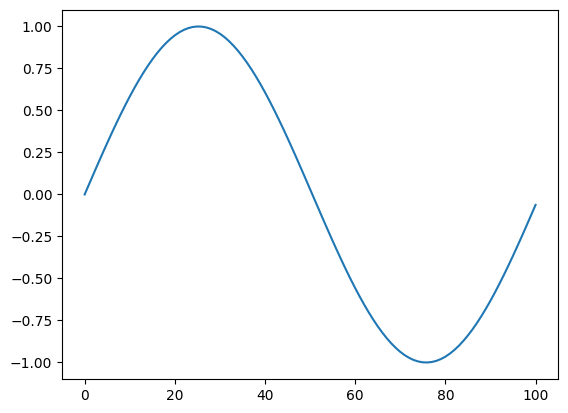

In [2]:
# parameter
xsize=100. #(m)
dx=1       #(m)

dt=0.1 # timestep (sec)
uvel=1.0  # horizontal velocity (m/s)
time=400. # total time of the simulation

# set up x grid and initial profile of q 
xpt=np.linspace(0,xsize,int(xsize/dx)+1)
print(xpt)



qinit=np.sin(2*np.pi*xpt/(xsize+1))

#qinit=(xpt>xsize/2)*2-1
#qinit=(qinit+np.roll(qinit,1)+np.roll(qinit,-1))/3
print(qinit)

plt.plot(xpt,qinit)
plt.show()

Now we want to discretize the equation

Using forward in time for $\frac{dq}{dt}$ and centered in space difference for $\frac{dq}{dx}$

$\frac{q_{t+1,i}-q_{t,i}}{\Delta t} + u \frac{q_{t,i+1}-q_{t,i-1}}{2 \Delta x}=0$

giving us an expression for the future value 

$q_{t+1,i} = q_{t,i} - u\Delta t \frac{q_{t,i+1}-q_{t,i-1}}{2 \Delta x}$

Instead the "true" solution is known, since we can simply "rotate" the original solution to the right.

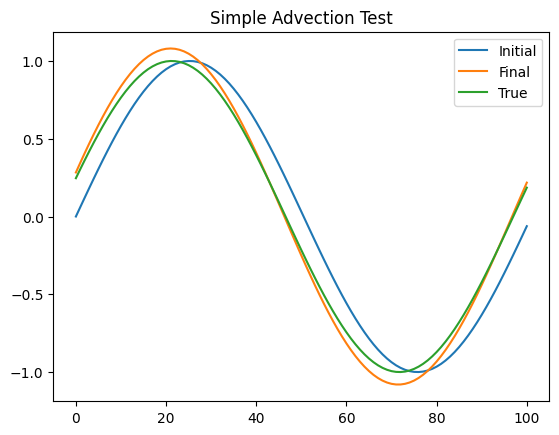

In [3]:
nsteps=int(time/dt)
q0=qinit # current value
K0=uvel*dt/(2*dx)

# integrate equations
for it in range(nsteps):
    q1=q0-K0*(np.roll(q0,-1)-np.roll(q0,1))
    q0=q1
    qtrue=np.roll(qinit,int((it+1)*dt*uvel))

fig, ax = plt.subplots()
ax.set_title("Simple Advection Test")
ax.plot(xpt,qinit,label="Initial")       
ax.plot(xpt,q1,label="Final")
ax.plot(xpt,qtrue,label="True")

ax.legend() 
plt.show()

## HOMEWORK EXERCISE, part 1

- Make a calculation of the root mean square error between the numerical solution and the true solution, and see how it changes as a function of time 
- Repeat the exercise with the timestep doubled and then quadrupled.
- Repeat the exercise with the spatial resolution doubled and then quadrupled.
- Set up a square wave function and repeat the above exercise 



A semi-Langrangian approach to the advection program works similarly to the "true solution", in that the solution at any point is derived from the upstream value (i.e. the value at the departure point $x_i=x-u\Delta t $. If $u\Delta t $ is non-integer, this departure point does not fall directly on a grid value, but lies somewhere between two gridcells. Thus some form of interpolation is required to get the value of $q$ at the departure point.  This method is widely used in numerical models since it is absolutely stable.  Methods differ through their approaches of estimating the departure point value. 

## HOMEWORK EXERCISE PART 2 

write a simple semi-Langrangian advection scheme where the upstream departure value is calculated using simple bilinear interpolation between the neighboring cells.  Show the resulting solution for timesteps of 0.35, 0.85, 1.55 and 5.55 seconds.  What do you notice about the accuracy of the solution (as measured by the RMSE compared to the true solution) as the timestep increases?  *note that the true solution will be very slightly inaccurate as the roll function rotates the original array by an integer number of cells.  

### FINAL NOTE: 

This example is a key methodology that you should learn to use throughout your research life... Often we have an equation or a piece of code that performs an analysis, and we don't know what the solution should be exactly, even though we might have an idea of what it should look like roughly perhaps... The solution looks okay, but is it correct?  Well even if it looks okay, you should ALWAYS try to think of a test where you know *exactly* what the solution is, and that way you can be fairly sure the code is working correctly (yes, there can be issues or glitches which are not caught by the test though).  You will not believe how many subtle (and not so subtle!) coding issues I've caught through the years by performing these kinds of tests...